## Dragon Real Estate | Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64>

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284725,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703995,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
# for plotting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting

In [10]:
# for learning purposes
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
# train_set,test_set=split_train_test(housing,0.2)

In [12]:
# print(f"Rows in train set: {len(train_set)} \n Rows in test set: {len(test_set)}")

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)} \n Rows in test set: {len(test_set)}")

Rows in train set: 404 
 Rows in test set: 102


In [14]:
# stratified shuffle split is used because we want that our numerical_attributes must split in equal ratios in train set and test set
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
# 95/7

In [18]:
# 376/28

In [19]:
housing=strat_train_set.copy()

## Looking for Correlations


In [20]:
corr_matrix=housing.corr()

In [21]:
# strong positive correlation --> Means after increasing one factor, other factors are respectively incresaing or decreasing
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679538
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

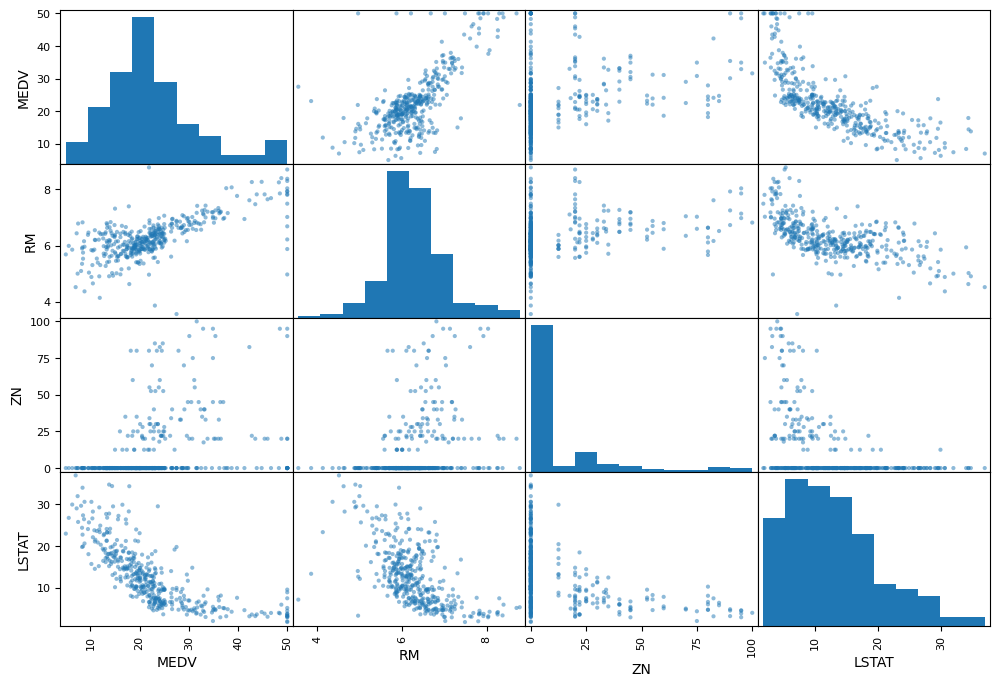

In [22]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize= (12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

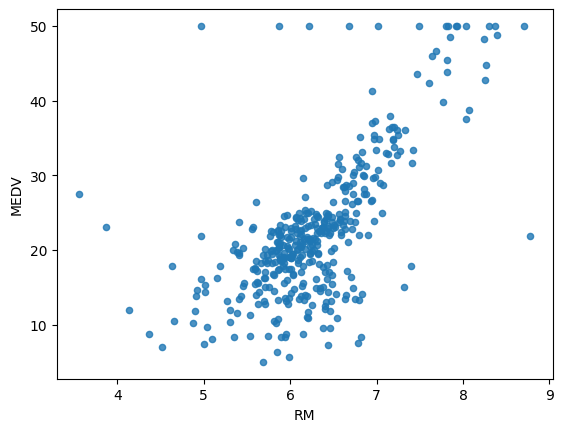

In [23]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

# Trying Out Attributes Combinations

In [24]:
# housing["TAXRM"]=housing['TAX']/housing['RM']

In [25]:
# housing.head()

In [26]:
# corr_matrix=housing.corr()
# corr_matrix['MEDV'].sort_values(ascending=False)

In [27]:
# housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [28]:
# splitting our labels and features
housing=strat_train_set.drop("MEDV",axis=1)
housing_label= strat_train_set["MEDV"].copy()

# Missing Attributes

In [29]:
# To take care of the missing attributes, we have three options:
#   1. To get rid of the missing data
#   2. To get rid of the whole attribute
#   3. Set the value to 0 mean or 0 median

In [30]:
a=housing.dropna(subset=["RM"]) #option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(401, 13)

In [31]:
housing.drop("RM", axis=1).shape #option 2
# Note that their is no RM colum and also Note that the original housing dataframe will remain unchanged

(404, 12)

In [32]:
median= housing["RM"].median() #compute median for option 3

In [33]:
housing["RM"].fillna(median) #option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [34]:
housing.shape

(404, 13)

In [35]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281788,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714819,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [38]:
X=imputer.transform(housing)

In [39]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281262,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712180,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

Primarily, three types of objects

1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - fits the dataset and calculates internal parameters

2. Transformers- transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and transforms.

3. Predictors- LinearRegression Model is an example of predict. fit() and predict() are two common functions. It also gives score() which will evaluate the predictions.

# Feature Scaling

Why feature Scaling?
Ans.Because machine learning algorithms perform very well when all numerical_attributes are on same scale. For Eg. in our data MEDV Ranges from 0 to 50 ,whereas LSTAT ranges from 0 to 30. So feature scaling scales all the numerical values on same range.

Primarily, two types of feature scaling methods:
1. Min-Max scaling (Normalization)
    (value-min)/(max-min)
    Sklearn provides a class called MinMaxScaler for this 
    
2. Standardization
    (value-mean)/std
    Sklearn provides a class called StandardScaler for this
    

# Creating a Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #....add as many as we want in our pipeline
    ('std_scaler',StandardScaler())
])

In [42]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [43]:
housing_num_tr.shape

(404, 13)

   # Selecting a desired model for our Real Estates Company

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
# model=AdaBoostRegressor()
model.fit(housing_num_tr,housing_label)

RandomForestRegressor()

In [45]:
some_data=housing.iloc[:5]

In [46]:
some_labels=housing_label.iloc[:5]

In [47]:
prepared_data=my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([22.47 , 25.226, 16.558, 23.221, 23.442])

In [49]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the Model 

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_label, housing_predictions)
rmse=np.sqrt(mse)

In [51]:
rmse

1.2251651404146002

# using better evaluation technique -Cross Validation

In [52]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_label,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)


In [53]:
rmse_scores

array([2.6535939 , 2.92303674, 4.30496364, 2.52459073, 3.41234311,
       2.60966958, 4.72868721, 3.36893575, 3.39457554, 3.40786816])

In [54]:
def print_scores(scores):
    print("scores: ",scores)
    print("Mean: ",scores.mean())
    print("standard deviation: ",scores.std())

In [55]:
print_scores(rmse_scores)

scores:  [2.6535939  2.92303674 4.30496364 2.52459073 3.41234311 2.60966958
 4.72868721 3.36893575 3.39457554 3.40786816]
Mean:  3.332826437492514
standard deviation:  0.6867338847512873


# Saving the Model

In [56]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

# Testing the Model in test data

In [57]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test, final_predictions)
final_rmse= np.sqrt(final_mse)
# print(final_predictions,list(y_test))

In [58]:
final_rmse

2.8610509689725587

In [59]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24358625, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using the Model

In [60]:
from joblib import dump, load
import numpy as np
model=load('Dragon.joblib')
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24358625, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.47])